# Part II - Effects of Loan Characteristics on Borrower's APR
## by Hatif Naqvi

## Investigation Overview

> In my analysis, the correlation the BorrowerAPR has a very weak correlation with each other variable. It's influence in a sense is negligible. The Loan amount has a negative correlation of -0.313 which still weak but indicates that the higher the loan amount the lower in the Borrower APR. Overall there aren't any linear relationships between the feature of interest vs other feature. The highest BorrowerAPR by prosper rating was Rating E.

> The loan original amount is positively correlated with the stated monthly income but is of a medium strength ~0.4, which understandabley makes sense because those with more money can borrow more since they have the ability to pay back compared to those making less. When the loan term increased we saw that that the median loan amount increase significantly from shorter term periods. The median Borrower APR for part-time employees is the lowest of all the employement statuses. The 100k+ Income Range Group was able to get the highest loan amounts compared to any other group while also having the lowest median BorrowerAPR.

## Investigation Overview Continued

> The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. The amplitude of the poorer rated loans was slightly larger compared to the better ratings.

> In my multivariate analysis I began to look at some more variables that may impact the BorrowerAPR such as Proper Rating and the DebtToIncomeRatio. In my exploration, the increase in terms and loan amount didn't play a significant factor on overall APR. It's not surprising to see that a higher loan rating led to a higher loan amount. This is visbile in ratings AA, A, and B.The APR increases for those in higher ProsperRating as they try to borrow more which makes sense because its a way to defer people from borrow to much. It is also more beneficial for those in higher loan ratings to borrow in shorter terms because the ARR is actually much lower on average. The overall loan amount is influenced significantly by the length of terms and ratings. While, the DebtToIncomeRatio has a very minimal influence from the terms and ratings.

## Dataset Overview

> The dataset consisted of borrower APRs and attributes of 2,765 loans. The attributes included in my analysis are:  Employment Status, Income_Range, Term, LoanOriginalAmount, DebtToIncomeRatio, 'ProsperRating (Alpha)'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
import csv
df = pd.read_csv('prosperLoanData.csv', encoding='utf-8',error_bad_lines=False, engine="python")

Skipping line 2767: unexpected end of data


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration - Distribution of BorrowerAPR

> The BorrowerAPR is multi-modal meaning there are several peaks of distribution. It looks like there is heavy distribution between 0.125 and 0.25 while there are some peaks at 0.3 and 0.35 meaning that majority of borrowers are getting high interest rates between 0.125 and 0.25 and some of those even higher. Will we see a similar multi-modal distribution in Loan Amounts as well?

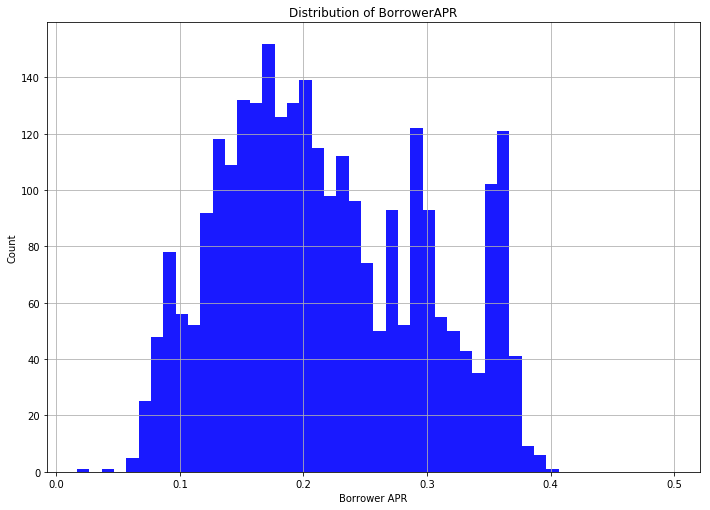

In [3]:
plt.figure(figsize=[ 11.69, 8.27])
bins = np.arange(min(df["BorrowerAPR"]), max(df["BorrowerAPR"])+0.1, 0.01)
#plt.hist(data = df, x = "BorrowerAPR", bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of BorrowerAPR')

df['BorrowerAPR'].hist(alpha=0.9, color='blue', bins = bins)

## Univariate Exploration - Distribution of Loan Amount

> The distribution of the Loan Amount is skewed heavily to the right and there is a high density of the loans between 0 and 10,000. Interestingly, loan amount distribution isn't multi-modal. Maybe the Prosper Score plays an influence on the BorrowerAPR multi-modal distribution?

(0, 30000)

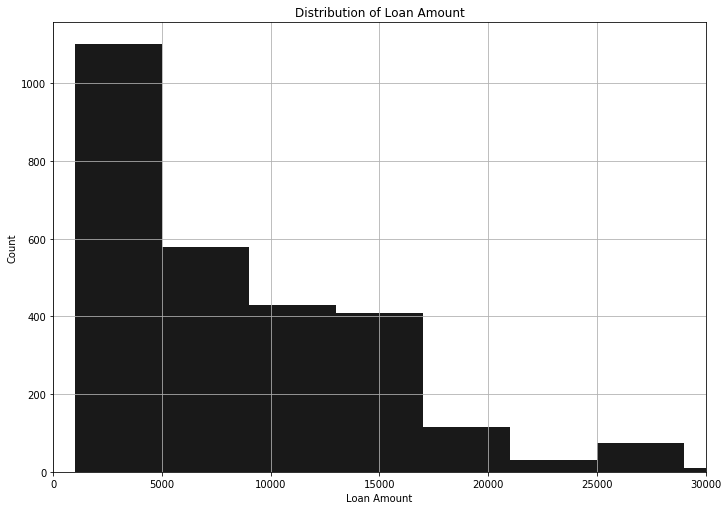

In [4]:
plt.figure(figsize=[ 11.69, 8.27])
bins = np.arange(min(df["LoanOriginalAmount"]), max(df["LoanOriginalAmount"]), 4000)
#plt.hist(data = df, x = "BorrowerAPR", bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')

df['LoanOriginalAmount'].hist(alpha=0.9, color='black', bins = bins)
plt.xlim([0, 30000])

## Univariate Exploration - Distribution of ProsperRating

> There is a normal distribution of Prosper Ratings where C happens to be the median. Credit Grades of C, D, and B, and A happen to be the most common. Which relationship PropserRating vs BorrowerAPR or Loan Amount vs BorrowerAPR will have a bigger influence on the BorrowerAPR?

Text(0,0.5,'Count')

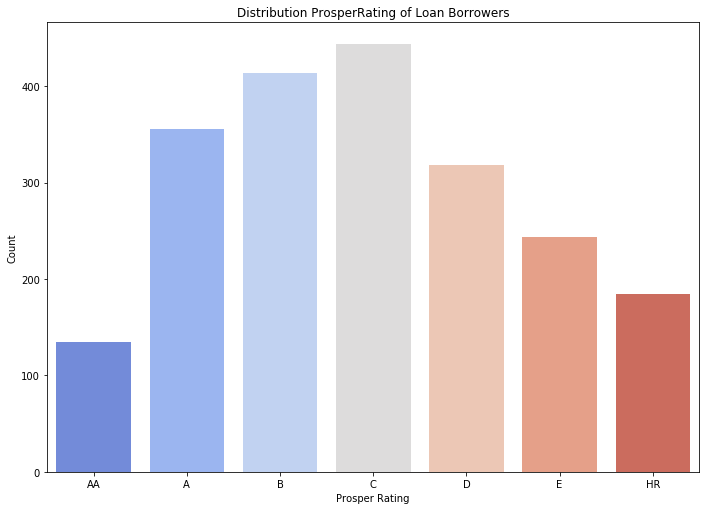

In [5]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(x='ProsperRating (Alpha)', data=df, palette = 'coolwarm',  order=['AA','A','B','C','D','E','HR'])
plt.title('Distribution ProsperRating of Loan Borrowers')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')

## Bivariate Analysis - Correlation Heatmap Between 5 Features Influencing BorrowerAPR

> In terms of correlation the BorrowerAPR has a weak correlation with each other variable. The Loan amount has a negative correlation of -0.313 which still weak but indicates that the higher the loan amount the lower in the Borrower APR

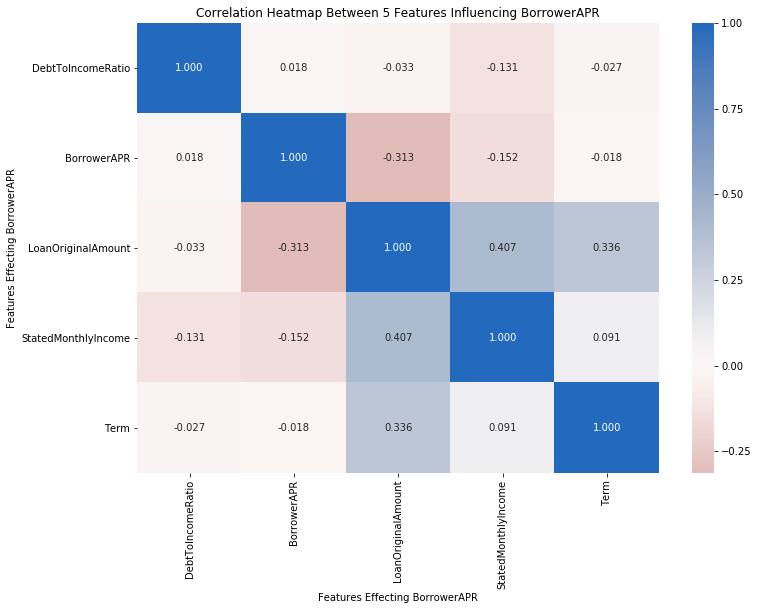

In [6]:
#we'll be making a heat map to showcase correlations between some of the variables
#BorrowerRate, Occupation, Employment Status, EmploymentStatusDuration
#Income_Range, CreditGrade, Term, LoanOriginalAmount, LP_CustomerPayments, DebtToIncomeRatio, InterestRateType
var = ['DebtToIncomeRatio', 'BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Term']
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(df[var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.xlabel('Features Effecting BorrowerAPR')
plt.ylabel('Features Effecting BorrowerAPR')
plt.title('Correlation Heatmap Between 5 Features Influencing BorrowerAPR')
plt.show()

## Bivariate Analysis - Borrower vs Loan Amount

> What is interesting is the lower the Loan Amount the higher the BorrowerAPR. We can see that those who borrow 5000 get a APR of 0.3% to 0.36%. Those borrowing 10000 to 15000 their APR's are nearly half with the range being 0.125% to 0.25%. Something to look into is how income and ProsperRating influences APR.

> The Borrower APR decresases as the Loan Amount increases.

> Loan Amounts also seem to be distributed by density by a multiple of 5000.

> Will the ProsperRating show why there is a distribution by multiples of 5000? Is it a result of their which influences the amount they can borrow and at what rate?

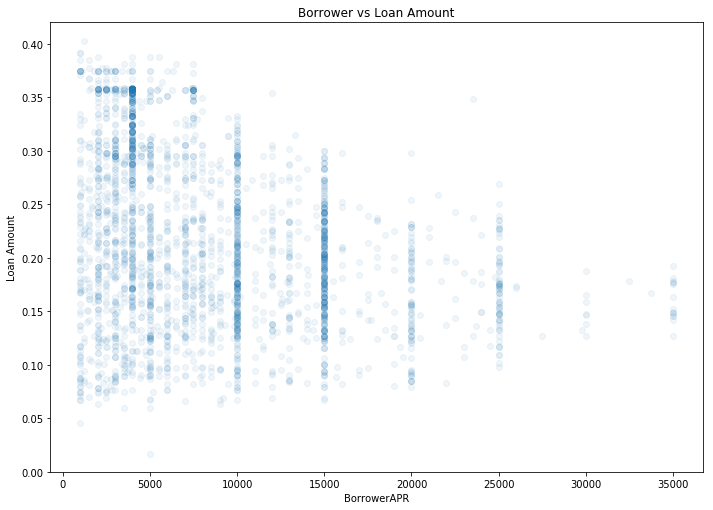

In [7]:
plt.figure(figsize=[ 11.69, 8.27])
plt.scatter(data = df, y = 'BorrowerAPR', x = 'LoanOriginalAmount', alpha = 1/15)
plt.ylim([0, 0.42])
plt.xlabel('BorrowerAPR')
#plt.yscale('log')
#plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Loan Amount')
plt.title('Borrower vs Loan Amount')
plt.show()

## Multivariate Analysis - Borrower vs Loan Amount vs Prosper Rating

> It's not surprising to see that as the loan rating increases so does the loan amount. If you look at the ProsperRating of AA. The Borrower APR also decreases for those that have a higher ProsperRating. The APR increases for those in higher ProsperRating as they try to borrow more which makes sense because its a way to defer people from borrow to much. On the other side the ProsperRatings that are much lower they generally have a higher APR because they likely have a harder chance paying back the loan.

> We do see a breakdown of Loan Amounts based on Propser Rating. We can see that there low ratings C-HR have some sporatic distribution from 0-5000, and as we get closer to C there is density of distribution at 5000 and 10000. The higher Ratings we also see distribution of higher loan values >10000.

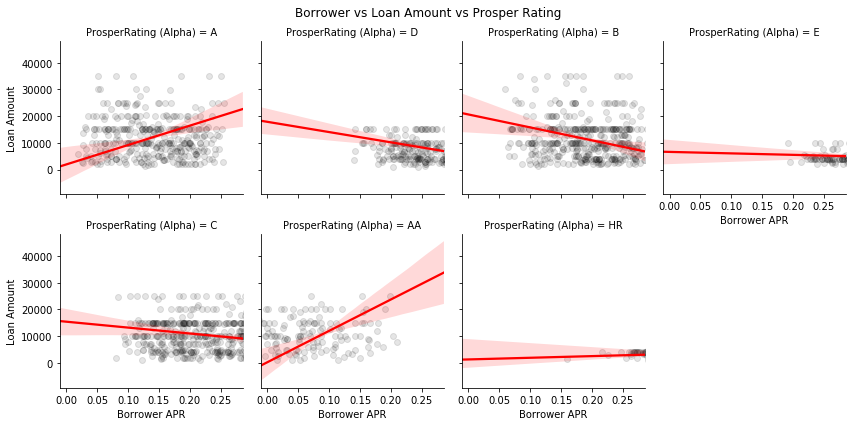

In [8]:
plt.figure(figsize=[11.69, 8.27])
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.1, 
     scatter_kws={'alpha':0.1, "color": "black"}, line_kws={"color": "red"})
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount')
g.fig.suptitle('Borrower vs Loan Amount vs Prosper Rating')
g.fig.subplots_adjust(top=0.9)
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
#!jupyter nbconvert "Part_II_slide_deck.ipynb" --to slides --post serve --no-input --no-prompt
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 604358 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
